# 数据读取

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号

In [2]:
path =  'final.csv'
data = pd.read_csv(path,encoding='gbk')
data.head()

,点击率,转化率,成交率,加购率,收藏率,综合成交ROI,计划全名称,投放日期,品牌名称,byhe,mxwl,pcbd
0,0.010,0.253,0.003,0.138,0.023,0.13,"byhe,2021-02-23,kolMT1,D5pro15'D5pro16,IOS_150...",2021-05-01,byhe,1,0,0
1,0.021,0.149,0.016,0.111,0.000,0.10,"byhe,2021-03-23,XDZ01,D5pro3'D5pro4,IOS_GNJQ_pro1",2021-05-01,byhe,1,0,0
2,0.010,0.189,0.053,0.113,0.013,0.74,"byhe,2021-03-23,XDZ01,D5pro5'D5pro6,IOS_LS_pro1",2021-05-01,byhe,1,0,0
3,0.013,0.178,0.000,0.122,0.061,0.00,"byhe,2021-04-07,XDZ01,D5pro50'D5pro51,IOS_KJJQ...",2021-05-01,byhe,1,0,0
4,0.013,0.409,0.042,0.130,0.000,0.96,"byhe,2021-04-07,XDZ01,D5pro55'D5pro49,IOS_GNJQ...",2021-05-01,byhe,1,0,0


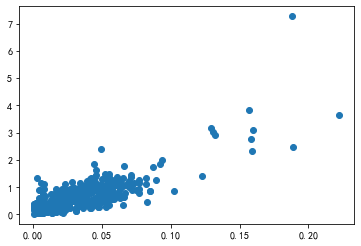

In [3]:
plt.scatter(data.成交率[data.成交率>0],data.综合成交ROI[data.成交率>0])

## 特征x与目标y选择

In [4]:
"一元线性回归，拥有两个参数，一个为点击率的参数，一个为截距。所以这里我们创建一列名为Ones的列，用于乘以截距"
data['Ones'] = 1 #创建一个名为Ones的字段，内容全是1
X = data.成交率[data.成交率>0].reset_index(drop=True) 
X = np.column_stack([data['Ones'][:len(X)],X]) # ones与点击率作为我们的输入 X ， 通过column_stack将他俩拼在一起
y = data.综合成交ROI[data.成交率>0].reset_index(drop=True) # 综合成交ROI作为我们的预测对象 y

In [5]:
"对X,y转换为矩阵，方便我们在梯度下降的时候使用矩阵运算"
X = np.matrix(X) #将X转换为矩阵类型matrix
y = np.matrix(y).reshape(-1,1) #将y转换为矩阵类型matrix
theta = np.matrix(np.array([0,0])) #初始化我们的参数θ，为[0,0]，也是矩阵类型matrix

# 代价函数

In [6]:
"""
总体误差平方和
"""
def computeCost(X, y, theta):
    cost = np.power(((X * theta.T) - y), 2) #每个样本与真实值的差 再做平方
    return np.sum(cost) / (2 * len(X)) # 总体误差平方和 / 2m

# 梯度下降

error = (X * theta.T) - y:
$${{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}$$   
mul = np.multiply(error, X[:,j]):$${{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}{{x}^{(j)}}$$  
temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(mul)):$${{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{2m}\sum\limits_{i=1}^{m} {{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}\left( {{x}^{(j)}} \right)$$

In [7]:
"迭代iters次theta，返回最后一次更新的theta与每组的Cost"
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #temp顾名思义，临时的意思，用来暂存更新好的参数θ
    parameters = int(theta.shape[1]) #参数个数，来作为循环条件，有多少个，我们就循环更新多少次
    cost = np.zeros(iters) #用来装损失值的数组，每循环一次我们就计算一次
    
    for i in range(iters):
        error = (X * theta.T) - y # error：预测值与真实值的误差 
        for j in range(parameters):
            mul = np.multiply(error, X[:,j]) # error与Xj的乘积
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(mul)) # 参数更新公式（完全体）
            
        theta = temp # 将更新好的参数覆盖到theta
        cost[i] = computeCost(X, y, theta) #存储这次循环的损失值
        
    return theta, cost

In [8]:
g , c = gradientDescent(X, y, theta, 0.001, iters=1000)

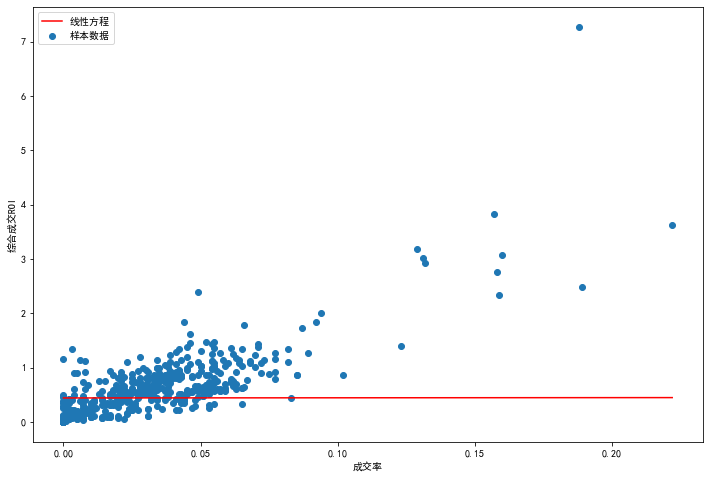

In [9]:
x = np.linspace(data.成交率.min(), data.成交率.max(), 10) #成交率的范围内，取10个数，用于计算出拟合的直线
f = g[0, 0] + (g[0, 1] * x) # f 是我们的线性方程， g[0,0]和g[0,1]分别为θ0和θ1 。把他看成 y = b + ax 就好理解了

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='线性方程')
ax.scatter(data.成交率, data.综合成交ROI, label='样本数据')
ax.legend(loc=2)
ax.set_xlabel('成交率')
ax.set_ylabel('综合成交ROI')
plt.show()

# scikti-learn用法

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #使变量model为线性回归模型
model.fit(np.array(data.成交率).reshape(-1,1),np.array(data.综合成交ROI).reshape(-1,1)) #拟合模型

LinearRegression()

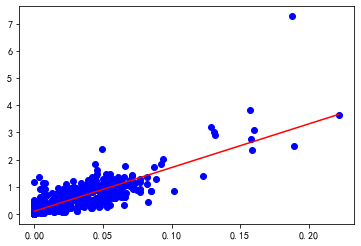

In [11]:
plt.plot(x,model.predict(x.reshape(-1,1)),c = 'r')
plt.scatter(np.array(data.成交率),np.array(data.综合成交ROI),c='b')